In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/kaggle data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,0
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,0
3,0,135,68,42,250,42.3,0.365,24,0
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
data.shape

(2000, 9)

In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


# Data Visualization

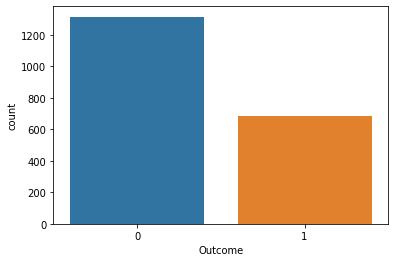

In [6]:
sns.countplot(x= 'Outcome', data=data)

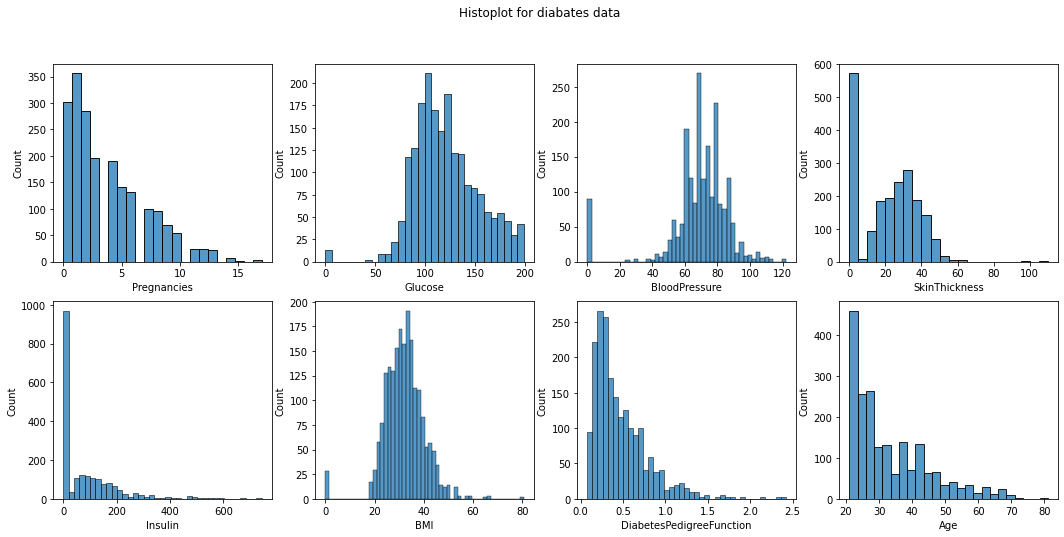

In [7]:
fig, axes = plt.subplots(2,4,figsize= (18,8))
fig.suptitle('Histoplot for diabates data')

sns.histplot(ax = axes[0,0], x='Pregnancies', data= data)
sns.histplot(ax = axes[0,1], x='Glucose', data= data)
sns.histplot(ax = axes[0,2], x='BloodPressure', data= data)
sns.histplot(ax = axes[0,3], x='SkinThickness', data= data)
sns.histplot(ax = axes[1,0], x='Insulin', data= data)
sns.histplot(ax = axes[1,1], x='BMI', data= data)
sns.histplot(ax = axes[1,2], x='DiabetesPedigreeFunction', data= data)
sns.histplot(ax = axes[1,3], x='Age', data= data)

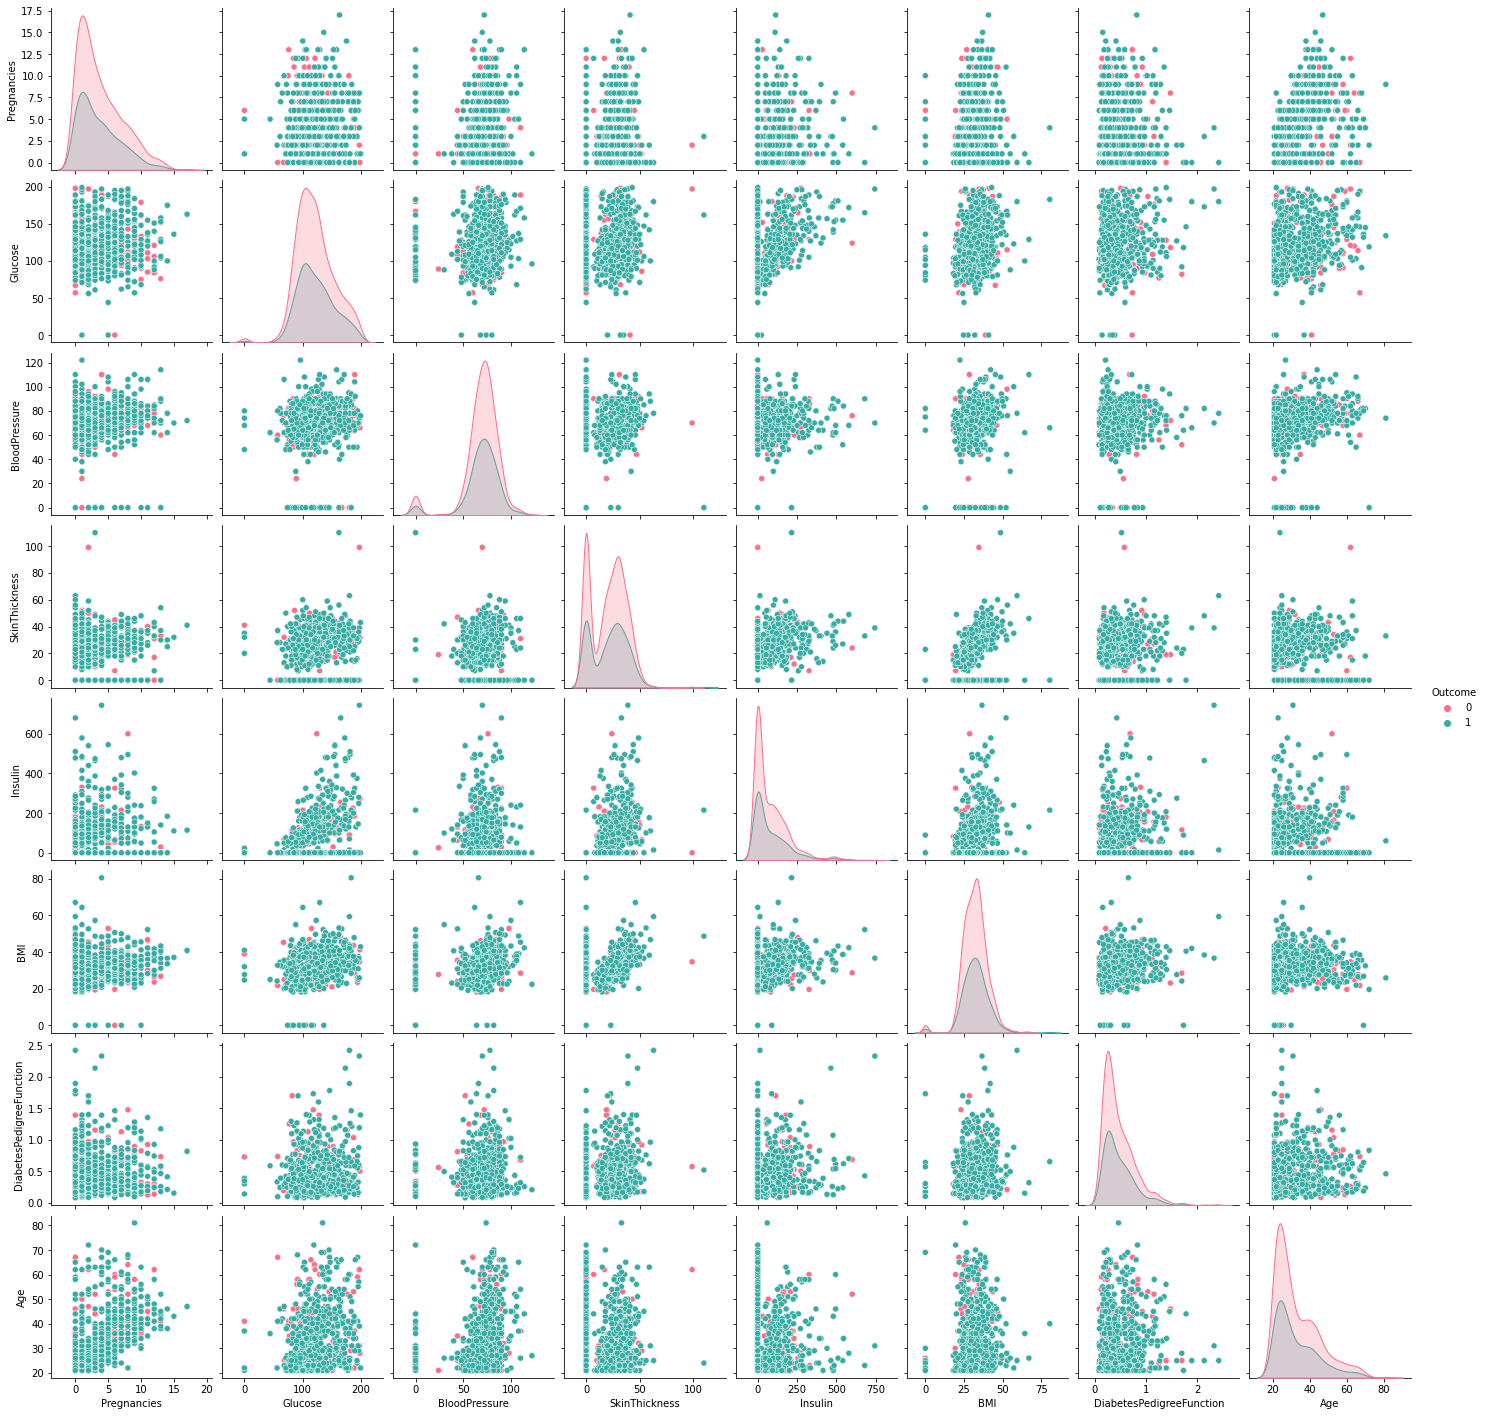

In [8]:
sns.pairplot(data = data, hue = 'Outcome', palette= 'husl')
plt.show()

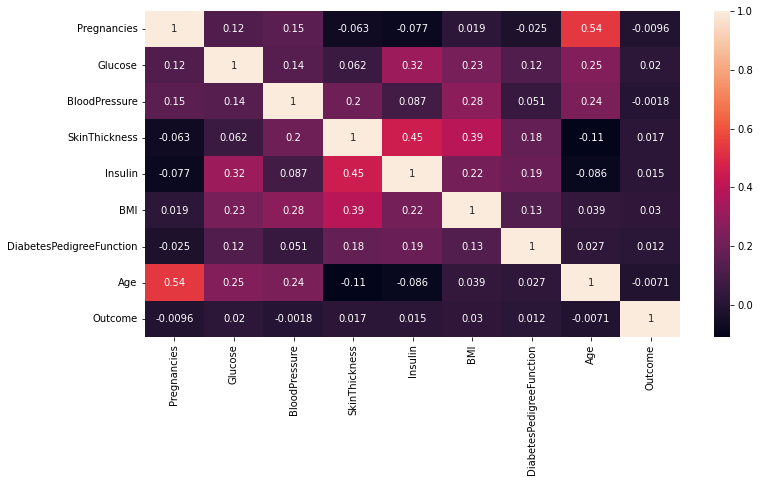

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot= True)
plt.show()

In [10]:
correlation_matrix = data.corr()
correlation_matrix['Outcome'].sort_values(ascending = False)

Outcome                     1.000000
BMI                         0.029609
Glucose                     0.019731
SkinThickness               0.017249
Insulin                     0.015345
DiabetesPedigreeFunction    0.012154
BloodPressure              -0.001787
Age                        -0.007058
Pregnancies                -0.009629
Name: Outcome, dtype: float64

# Data Preprocessing

In [11]:
new_data= data.copy()
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
scaled_data = sc.fit_transform(new_data)
scaled_data

array([[0.11764706, 0.69346734, 0.50819672, ..., 0.02092229, 0.43333333,
        0.        ],
       [0.        , 0.42211055, 0.67213115, ..., 0.06618275, 0.03333333,
        0.        ],
       [0.        , 0.72864322, 0.        , ..., 0.23569599, 0.16666667,
        0.        ],
       ...,
       [0.35294118, 0.42713568, 0.63934426, ..., 0.12980359, 0.35      ,
        1.        ],
       [0.        , 0.64824121, 0.90163934, ..., 0.1029035 , 0.08333333,
        1.        ],
       [0.11764706, 0.40703518, 0.59016393, ..., 0.20025619, 0.06666667,
        1.        ]])

In [12]:
scaled_data= pd.DataFrame(scaled_data)
scaled_data

,0,1,2,3,4,5,6,7,8
0,0.117647,0.693467,0.508197,0.318182,0.000000,0.416873,0.020922,0.433333,0.0
1,0.000000,0.422111,0.672131,0.281818,0.168011,0.473945,0.066183,0.033333,0.0
2,0.000000,0.728643,0.000000,0.000000,0.000000,0.548387,0.235696,0.166667,0.0
3,0.000000,0.678392,0.557377,0.381818,0.336022,0.524814,0.122545,0.050000,0.0
4,0.058824,0.698492,0.508197,0.372727,0.645161,0.504963,0.195559,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
1995,0.117647,0.376884,0.524590,0.218182,0.073925,0.368486,0.124680,0.200000,1.0
1996,0.470588,0.899497,0.590164,0.381818,0.174731,0.405707,0.273698,0.250000,1.0
1997,0.352941,0.427136,0.639344,0.000000,0.000000,0.387097,0.129804,0.350000,1.0
1998,0.000000,0.648241,0.901639,0.418182,0.174731,0.832506,0.102904,0.083333,1.0


# Feature Selection

In [46]:
y = scaled_data.iloc[:, 8].values
X = scaled_data.iloc[:, [1,3,4,5]].values

# Train - Test Split

In [47]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7, test_size = 0.3, random_state = 1)

In [61]:
print(X_train.shape, X_test.shape)

(1400, 4) (600, 4)


In [62]:
print(y_train.shape, y_test.shape)

(1400,) (600,)


# Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5)
model = model.fit(X_train,y_train)
model 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
print('score in training set:', model.score(X_train,y_train))
print('score in test set:', model.score(X_test,y_test))

score in training set: 0.6678571428571428
score in test set: 0.6483333333333333


# K-Neartest Neighbour

In [65]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


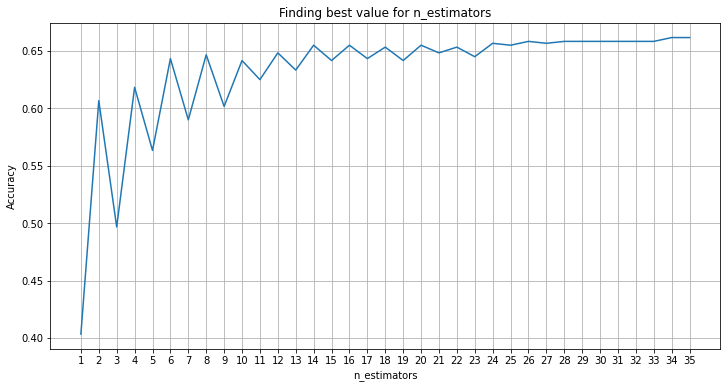

In [66]:
X_axis = list(range(1, 36))
acc = pd.Series()
x = range(1,36)

for i in list(range(1, 36)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, y_test)))

plt.figure(figsize=(12,6))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [67]:
knn = KNeighborsClassifier(n_neighbors = 14, metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

In [68]:
print('score in training set:',knn.score(X_train,y_train))
print('score in test set:',knn.score(X_test,y_test))

score in training set: 0.6557142857142857
score in test set: 0.655


In [69]:
y_pred_knn = knn.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[391,   6],
       [201,   2]])

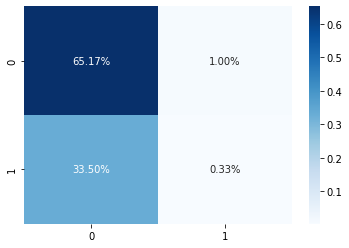

In [71]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%',cmap='Blues')

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.66      0.98      0.79       397
         1.0       0.25      0.01      0.02       203

    accuracy                           0.66       600
   macro avg       0.46      0.50      0.40       600
weighted avg       0.52      0.66      0.53       600

